In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups(data_home='./data', subset='all')
data.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [3]:
data.target[0]

10

In [4]:
print(type(data.data))
print(len(data.data))

<class 'list'>
18846


In [5]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
categories = data.target_names

In [7]:
# split data into test/train

X_train, y_train = fetch_20newsgroups(data_home='./data', subset='train', categories=categories, shuffle=True, random_state=21, return_X_y=True)
X_test, y_test = fetch_20newsgroups(data_home='./data', subset='test', categories=categories, shuffle=True, random_state=21, return_X_y=True)

In [8]:
print(len(X_train))
print(len(X_test))
print(X_train[0])
print(f'{y_train[0]} - {categories[y_train[0]]}')

11314
7532
From: mcg2@ns1.cc.lehigh.edu (Marc Gabriel)
Subject: Bouncing LymeNet newsletters...
Organization: Lehigh University
Lines: 22

The following 4 addresses are on the LymeNet mailing list, but are rejecting
mail.  Since the list server originally accepted these addresses successfully,
I assume these addresses have since been eliminated.  Improperly functioning
mail gateways might also be responsible.

If you are listed here and would still like to remain on the list, please
write to me.  Otherwise, I will remove these addresses from the list before the
next newsletter goes out.

As a general rule, please remember to *unsubscribe* from all your mailing
lists before your account is closed.  This will save the listserv maintainer
from many headaches.

Lezliel@Sitka.Sun.COM
Kenneth_R_Hall@Roch817.Xerox.COM
Westmx!ayoub@uunet.uu.net
Absol.absol.com!rsb@panix.COM
-- 
--
---------------------------------------------------------------------
              Marc C. Gabriel        -  U.C.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [10]:
# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [11]:
# Training the model with the train data
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [12]:
# Creating Labels for the test data
labels = model.predict(X_test)

In [13]:
labels

array([15, 15,  7, ..., 11, 10,  3])

In [14]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)

In [15]:
mat

array([[166,   0,   0,   1,   0,   1,   0,   0,   1,   1,   1,   3,   0,
          6,   3, 123,   4,   8,   0,   1],
       [  1, 252,  15,  12,   9,  18,   1,   2,   1,   5,   2,  41,   4,
          0,   6,  15,   4,   1,   0,   0],
       [  0,  14, 258,  45,   3,   9,   0,   2,   1,   3,   2,  25,   1,
          0,   6,  23,   2,   0,   0,   0],
       [  0,   5,  11, 305,  17,   1,   3,   6,   1,   0,   2,  19,  13,
          0,   5,   3,   1,   0,   0,   0],
       [  0,   3,   8,  23, 298,   0,   3,   8,   1,   3,   1,  16,   8,
          0,   2,   8,   3,   0,   0,   0],
       [  1,  21,  17,  13,   2, 298,   1,   0,   1,   1,   0,  23,   0,
          1,   4,  10,   2,   0,   0,   0],
       [  0,   1,   3,  31,  12,   1, 271,  19,   4,   4,   6,   5,  12,
          6,   3,   9,   3,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   4, 364,   3,   2,   2,   4,   1,
          1,   3,   3,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   2,  10, 371,   0,   0,  

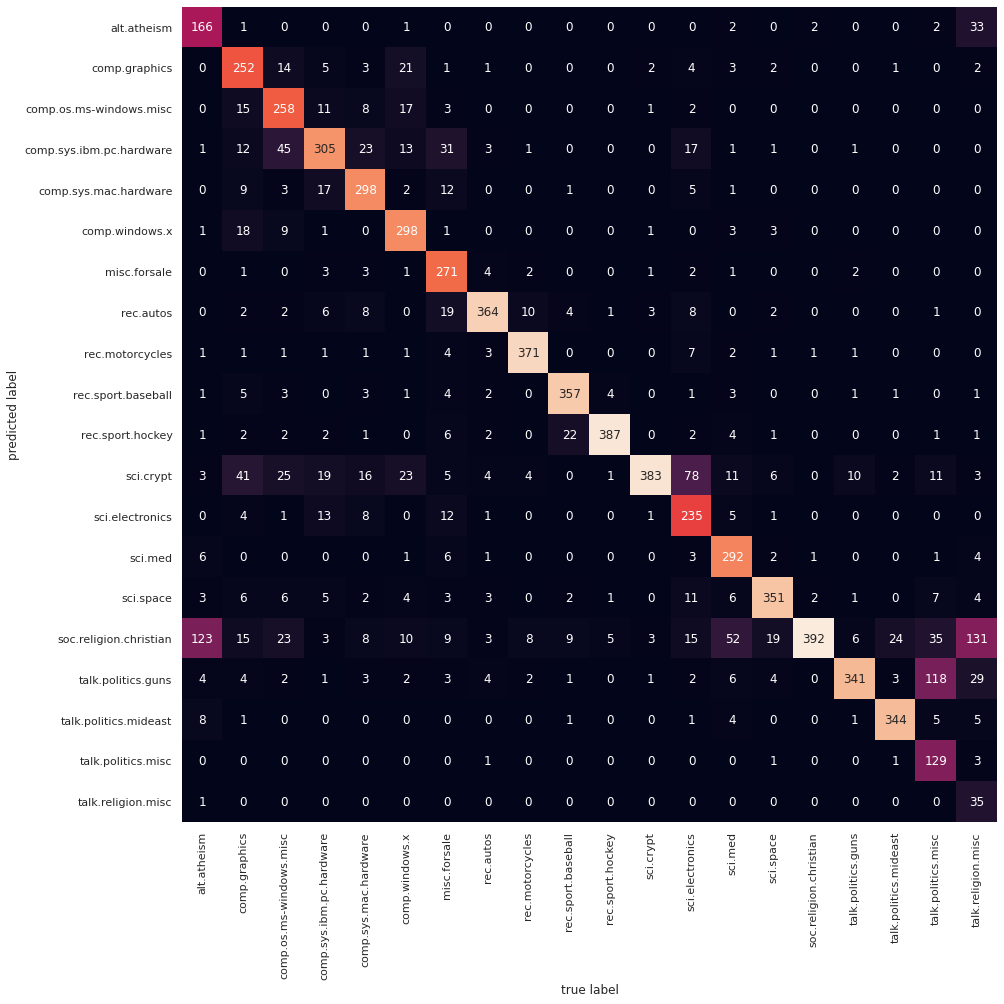

In [16]:
# Creating Heat Map from confusion matrix
plt.subplots(figsize=(20,15))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [17]:
# Predicting category on new data based on trained model
def predict_category(article, model=model):
    pred = model.predict([article])
    return pred[0]

In [18]:
categories[predict_category('I need to take my car to garage for oil change', model)]

'rec.autos'

In [19]:
categories[predict_category('earth revolves around the sun', model)]

'sci.space'

In [20]:
categories[predict_category('How can you improve your immune system? On the whole, your immune system does a remarkable job of defending you against disease-causing microorganisms. But sometimes it fails: A germ invades successfully and makes you sick. Is it possible to intervene in this process and boost your immune system? What if you improve your diet? Take certain vitamins or herbal preparations? Make other lifestyle changes in the hope of producing a near-perfect immune response?', model)]

'sci.med'